In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\eleanore\AppData\Local\Temp\ipykernel_25532\2982857210.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
dfTrain = pd.read_csv('train.csv', delimiter=',')
dfTest = pd.read_csv('test.csv', delimiter=',')

In [3]:
dfTest["SalePrice"]=np.nan

In [4]:
dfGlobal=pd.concat([dfTrain,dfTest])
iDs=dfGlobal["Id"]
dfGlobal=dfGlobal.drop(columns=["Id"])

In [5]:
dfGlobal.sample(10).transpose()

,282,1245,1392,1379,795,767,1057,762,48,356
MSSubClass,160,20,85,20,60,50,20,20,190,20
MSZoning,FV,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotFrontage,35.0,65.0,68.0,NaN,70.0,75.0,70.0,NaN,33.0,NaN
LotArea,3768,8450,7838,8685,8400,12508,16561,23730,4456,9248
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,IR1,Reg,IR1,IR2,IR2,Reg,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Low,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,FR2,Inside,Inside,CulDSac,Inside,Inside,Inside,Inside,Inside,Inside


In [21]:
def prepareVariablesExplicatives(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    colonnesNumeriques=list(set(df.select_dtypes(include=numerics).columns)-set(["SalePrice"]))
    display(df[colonnesNumeriques].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8))
    dfFiltre=df[colonnesNumeriques].fillna(0)
    dfFiltre=pd.concat([df[["SalePrice"]],dfFiltre], axis=1)
    colonnesAutres=set(df.columns)-set(list(colonnesNumeriques)+["SalePrice"])
    dfNum=dfFiltre
    for c in colonnesAutres:
        dfNum=pd.concat([dfNum,pd.get_dummies(df[c])],axis=1)
    return dfNum    

array([[<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'PoolArea'}>],
       [<Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'MoSold'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>],
       [<Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'Fireplaces'}>],
       [<Axes: title={'center': 'MiscVal'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'BsmtFullB

,SalePrice,HalfBath,LotFrontage,LowQualFinSF,FullBath,GrLivArea,PoolArea,GarageArea,OverallQual,MoSold,...,ConLI,ConLw,New,Oth,WD,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
0,208500.0,1,65.0,0,2,1710,0,548.0,7,2,...,False,False,False,False,True,True,False,False,False,False
1,181500.0,0,80.0,0,2,1262,0,460.0,6,5,...,False,False,False,False,True,True,False,False,False,False
2,223500.0,1,68.0,0,2,1786,0,608.0,7,9,...,False,False,False,False,True,True,False,False,False,False
3,140000.0,0,60.0,0,1,1717,0,642.0,7,2,...,False,False,False,False,True,True,False,False,False,False
4,250000.0,1,84.0,0,2,2198,0,836.0,8,12,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,1,21.0,0,1,1092,0,0.0,4,6,...,False,False,False,False,True,False,False,False,True,False
1455,NaN,1,21.0,0,1,1092,0,286.0,4,4,...,False,False,False,False,True,False,False,False,False,True
1456,NaN,0,160.0,0,1,1224,0,576.0,5,9,...,False,False,False,False,True,True,False,False,False,False
1457,NaN,0,62.0,0,1,970,0,0.0,5,7,...,False,False,False,False,True,True,False,False,False,False


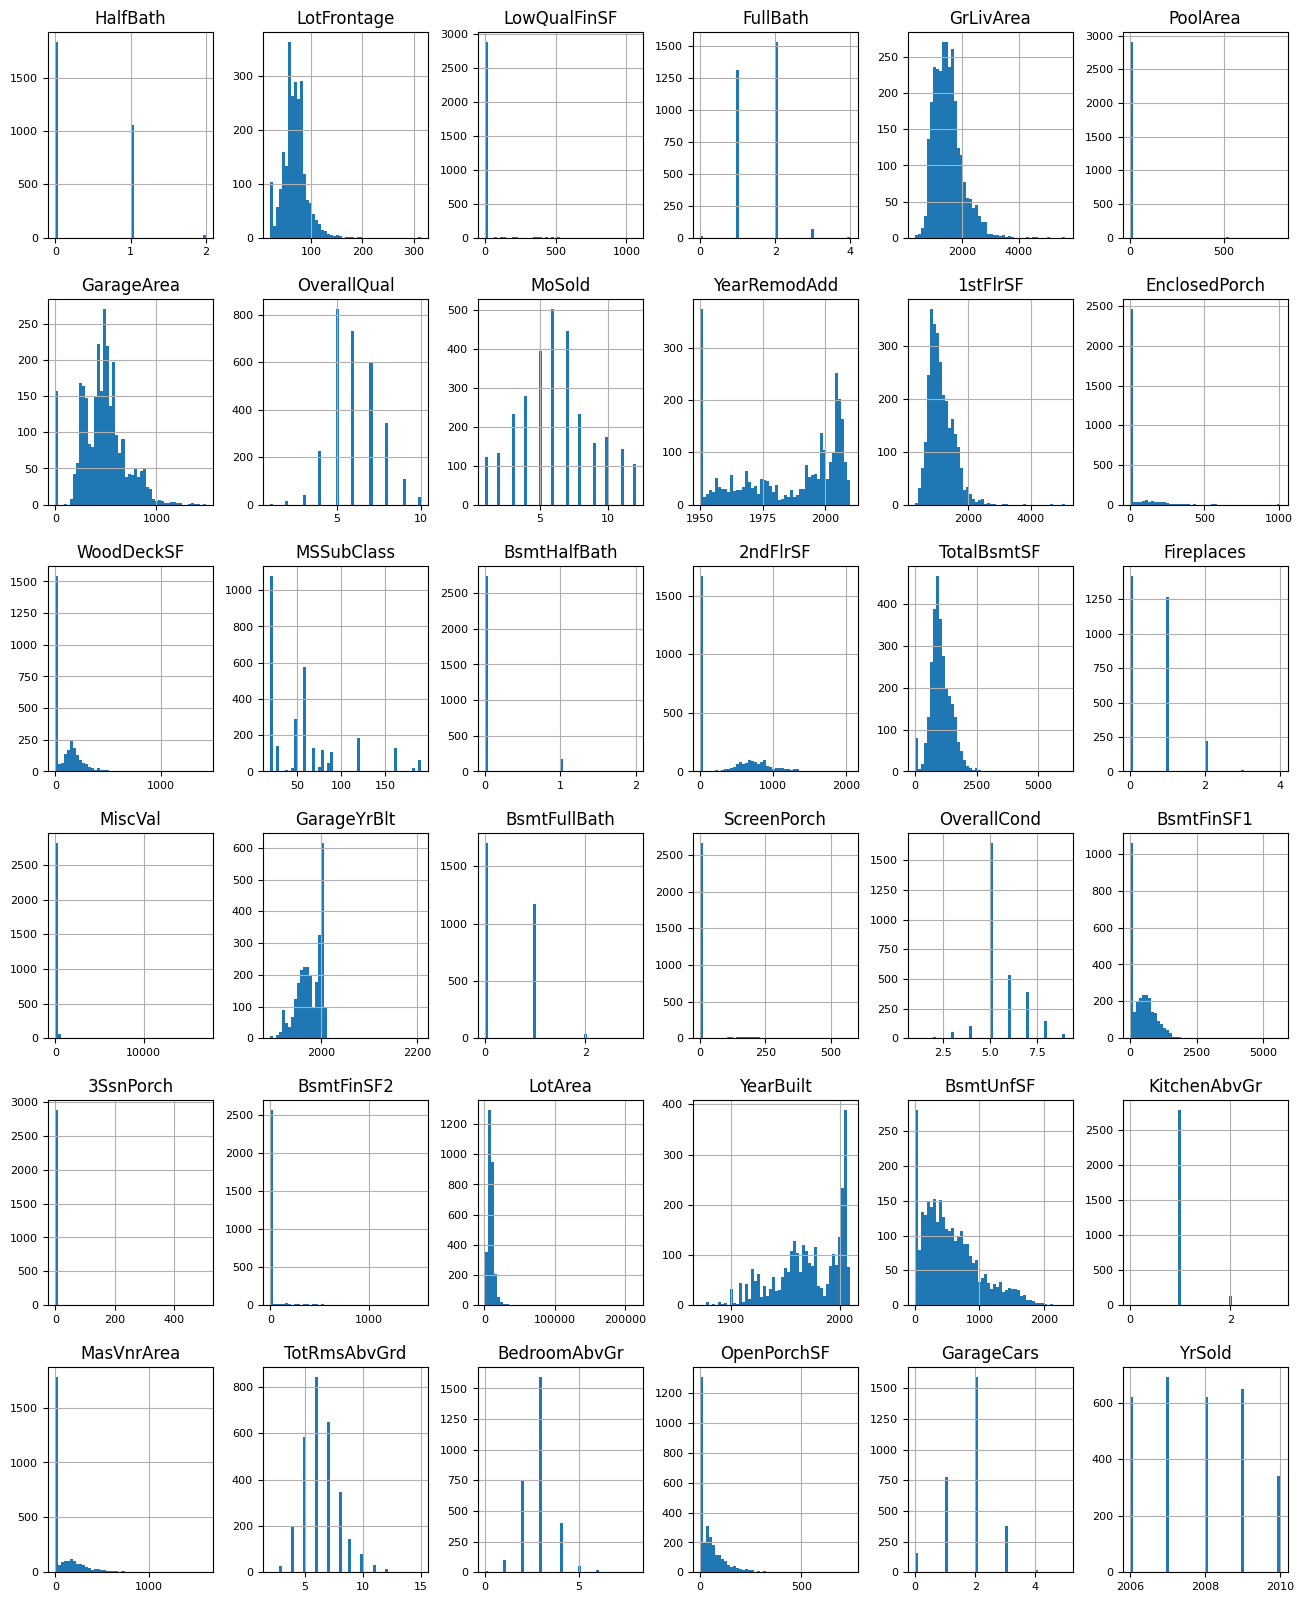

In [22]:
dfNumGlobal=prepareVariablesExplicatives(dfGlobal)
dfNumGlobal

In [23]:
dfNumFit=dfNumGlobal.dropna(subset=["SalePrice"])
dfNumFit

,SalePrice,HalfBath,LotFrontage,LowQualFinSF,FullBath,GrLivArea,PoolArea,GarageArea,OverallQual,MoSold,...,ConLI,ConLw,New,Oth,WD,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
0,208500.0,1,65.0,0,2,1710,0,548.0,7,2,...,False,False,False,False,True,True,False,False,False,False
1,181500.0,0,80.0,0,2,1262,0,460.0,6,5,...,False,False,False,False,True,True,False,False,False,False
2,223500.0,1,68.0,0,2,1786,0,608.0,7,9,...,False,False,False,False,True,True,False,False,False,False
3,140000.0,0,60.0,0,1,1717,0,642.0,7,2,...,False,False,False,False,True,True,False,False,False,False
4,250000.0,1,84.0,0,2,2198,0,836.0,8,12,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,1,62.0,0,2,1647,0,460.0,6,8,...,False,False,False,False,True,True,False,False,False,False
1456,210000.0,0,85.0,0,2,2073,0,500.0,6,2,...,False,False,False,False,True,True,False,False,False,False
1457,266500.0,0,66.0,0,2,2340,0,252.0,7,5,...,False,False,False,False,True,True,False,False,False,False
1458,142125.0,0,68.0,0,1,1078,0,240.0,5,4,...,False,False,False,False,True,True,False,False,False,False


# avec regression linéaire

In [24]:
from sklearn.linear_model import LinearRegression
X = dfNumFit.values[:,1:]
y = dfNumFit.values[:,:1]
reg = LinearRegression().fit(X, y)
display(reg.score(X, y))

0.9331962026582508

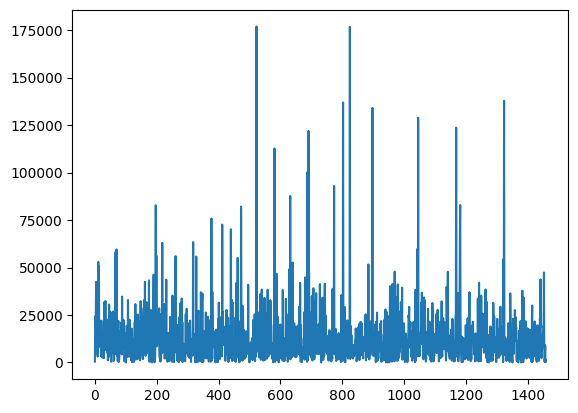

In [25]:
plt.plot(abs(y-reg.predict(X)))

In [26]:
mae = abs(y-reg.predict(X)).mean()
print("The mean absolute error on training set: {:.4f}".format(mae))

The mean absolute error on training set: 13228.5828


In [27]:
dfNumTest=dfNumGlobal

In [28]:
predictions=reg.predict(dfNumTest.values[:,1:])
predictions.squeeze()

array([208965.79177952, 205786.58633518, 205998.31472874, ...,
       176531.72702312, 115062.15455341, 223448.91868305])

# Avec xgboost

In [ ]:
# import xgboost as xgb
# reg = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     max_depth=500,
#     n_estimators=500
# )

In [ ]:
# X = dfNumFit.values[:,1:]
# X = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
# y = dfNumFit.values[:,:1]

# reg.fit(X, y)


In [ ]:
# mae = abs(y-reg.predict(X)).mean()
# print("The mean absolute error on training set: {:.4f}".format(mae))

# Soumission

In [29]:
dfSoumission=pd.DataFrame({"Id":iDs, "SalePrice":list(predictions.squeeze())})
dfSoumission

,Id,SalePrice
0,1,208965.791780
1,2,205786.586335
2,3,205998.314729
3,4,165264.687486
4,5,292485.556918
...,...,...
1454,2915,84441.324616
1455,2916,80403.953965
1456,2917,176531.727023
1457,2918,115062.154553


In [ ]:
dfSoumission=dfSoumission[dfSoumission["Id"].isin(dfTest.Id.values)]

In [ ]:
dfSoumission.to_csv("my_submission.csv", sep=',', index=False)